## Import required packages

In [2]:
# Importation of libraries
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import string
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import numpy as np
from sklearn.model_selection import train_test_split
import json
import time

import random
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report



## Import the dataset

In [3]:
## Uploading the dataset
from google.colab import files
file_path = files.upload()

Saving CETM47-22_23-AS2-Data.json to CETM47-22_23-AS2-Data.json


## Data Understanding:
In this phase, data sources and data quality are assessed, and data is explored to identify patterns and characteristics.

**Data exploration**

In [4]:
#Explore data using loads method from json library to identify patterns and characteristics
data_json = json.loads(open('CETM47-22_23-AS2-Data.json').read())

# Print the first 10 records of the tweets_data
data_json[0:10]

[{'text': 'The {@Clinton LumberKings@} beat the {@Cedar Rapids Kernels@} 4-0 in Game 1 of the Western Division finals. Evan Edwards hit a 2-run HR. WP Josh Roberson: 5 IP, 3 H, 0 R, 0 BB, 10 K #MWLplayoffs #MWLscoreboard',
  'date': '2019-09-08',
  'label': 4,
  'id': 1170516324419866624,
  'label_name': 'sports_&_gaming'},
 {'text': 'I would rather hear Eli Gold announce this Auburn game than these dumbasses. {@ESPN@}',
  'date': '2019-09-08',
  'label': 4,
  'id': 1170516440690176006,
  'label_name': 'sports_&_gaming'},
 {'text': 'Someone take my phone away, I’m trying to not look at {@Chicago Blackhawks@} home game tickets in October ',
  'date': '2019-09-08',
  'label': 4,
  'id': 1170516543387709440,
  'label_name': 'sports_&_gaming'},
 {'text': 'A year ago, Louisville struggled to beat an FCS opponent, ISU.  Yes they won 31-7, but score wasn’t indicative of the game flow.  Today, they are demoralizing a better FCS opponent in EKU. {@Coach Satterfield@} thank you!! {{USERNAME}} , 

In [5]:
# Explore the structure of the first item in the JSON data
print(type(data_json))
print(type(data_json[0]))
print(data_json[0].keys())


<class 'list'>
<class 'dict'>
dict_keys(['text', 'date', 'label', 'id', 'label_name'])


In [6]:
# select the set of six topic tweets

# Initialize empty lists to store tweets by topics
all_Arts_Culture_tweets = []
all_Business_Entrepreneurs_tweets = []
all_Pop_Culture_tweets = []
all_Daily_Life_tweets = []
all_Sports_Gaming_tweets = []
all_Science_Technology_tweets = []

# Iterate through the list and categorize tweets based on the 'label_name'
for item in data_json:
    if item['label_name'] == 'arts_&_culture':
        all_Arts_Culture_tweets.append(item)
    elif item['label_name'] == 'business_&_entrepreneurs':
        all_Business_Entrepreneurs_tweets.append(item)
    elif item['label_name'] == 'pop_culture':
        all_Pop_Culture_tweets.append(item)
    elif item['label_name'] == 'daily_life':
        all_Daily_Life_tweets.append(item)
    elif item['label_name'] == 'sports_&_gaming':
        all_Sports_Gaming_tweets.append(item)
    elif item['label_name'] == 'science_&_technology':
        all_Science_Technology_tweets.append(item)

# Check the extracted tweets for one of the topics
print(all_Sports_Gaming_tweets[:10])



[{'text': 'The {@Clinton LumberKings@} beat the {@Cedar Rapids Kernels@} 4-0 in Game 1 of the Western Division finals. Evan Edwards hit a 2-run HR. WP Josh Roberson: 5 IP, 3 H, 0 R, 0 BB, 10 K #MWLplayoffs #MWLscoreboard', 'date': '2019-09-08', 'label': 4, 'id': 1170516324419866624, 'label_name': 'sports_&_gaming'}, {'text': 'I would rather hear Eli Gold announce this Auburn game than these dumbasses. {@ESPN@}', 'date': '2019-09-08', 'label': 4, 'id': 1170516440690176006, 'label_name': 'sports_&_gaming'}, {'text': 'Someone take my phone away, I’m trying to not look at {@Chicago Blackhawks@} home game tickets in October ', 'date': '2019-09-08', 'label': 4, 'id': 1170516543387709440, 'label_name': 'sports_&_gaming'}, {'text': 'A year ago, Louisville struggled to beat an FCS opponent, ISU.  Yes they won 31-7, but score wasn’t indicative of the game flow.  Today, they are demoralizing a better FCS opponent in EKU. {@Coach Satterfield@} thank you!! {{USERNAME}} , glad you’re gone.', 'date':

In [7]:
# Calculate the total number of tweets across all six topics
all_six_topics_tweets = (
    all_Arts_Culture_tweets +
    all_Business_Entrepreneurs_tweets +
    all_Pop_Culture_tweets +
    all_Daily_Life_tweets +
    all_Sports_Gaming_tweets +
    all_Science_Technology_tweets
)

# Print the total number of tweets across all six topics
print('Number of tweets across all six topics: ', len(all_six_topics_tweets))

# Print the type of all_six_topics_tweets
print('\nThe type of all_six_topics_tweets is: ', type(all_six_topics_tweets))


Number of tweets across all six topics:  6443

The type of all_six_topics_tweets is:  <class 'list'>


## Data Visualization

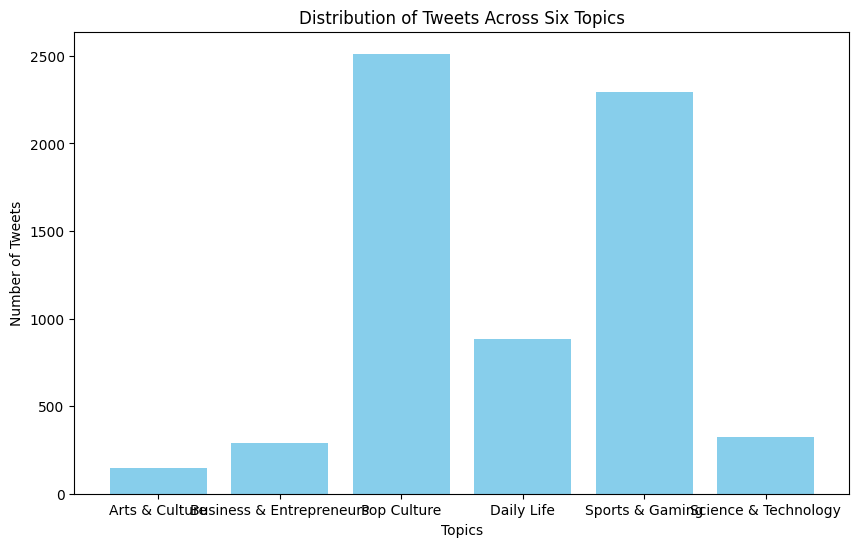

In [8]:
# Labels for the six topics
labels = [
    'Arts & Culture',
    'Business & Entrepreneurs',
    'Pop Culture',
    'Daily Life',
    'Sports & Gaming',
    'Science & Technology'
]

# Sizes for each category (number of tweets in each topic)
sizes = [
    len(all_Arts_Culture_tweets),
    len(all_Business_Entrepreneurs_tweets),
    len(all_Pop_Culture_tweets),
    len(all_Daily_Life_tweets),
    len(all_Sports_Gaming_tweets),
    len(all_Science_Technology_tweets)
]

# Declare a figure with a custom size
fig = plt.figure(figsize=(10, 6))

# Create a bar chart
plt.bar(labels, sizes, color='skyblue')

# Adding a title and labels
plt.title('Distribution of Tweets Across Six Topics')
plt.xlabel('Topics')
plt.ylabel('Number of Tweets')

# Display the chart
plt.show()


In [9]:
# Combine all six topic tweets into one list
all_six_topics_tweets = (
    all_Arts_Culture_tweets +
    all_Business_Entrepreneurs_tweets +
    all_Pop_Culture_tweets +
    all_Daily_Life_tweets +
    all_Sports_Gaming_tweets +
    all_Science_Technology_tweets
)

# Ensure the index is within the range of the combined list
random_index = random.randint(0, len(all_six_topics_tweets) - 1)

# Print a randomly selected tweet from the six topics in green
print('\033[92m' + all_six_topics_tweets[random_index]['text'] + '\033[0m')


⚡️ “The Three Paths to Welcoming the Lord Jesus’ Return” You are welcome to join our whatsapp group for discussion. {{URL}} {{URL}} #GodsWord #truth #WorshipGod #DailyDevotional {{USERNAME}} {{USERNAME}} {{USERNAME}} {{URL}}


## Preprocess raw text for Sentiment analysis

In [12]:
# Combine all six topic tweets into one list
all_six_topics_tweets = (
    all_Arts_Culture_tweets +
    all_Business_Entrepreneurs_tweets +
    all_Pop_Culture_tweets +
    all_Daily_Life_tweets +
    all_Sports_Gaming_tweets +
    all_Science_Technology_tweets
)

# Ensure the index is within the range of the combined list
if len(all_six_topics_tweets) > 2277:
    # Our selected sample, complex enough to exemplify each step
    tweet = all_six_topics_tweets[2277]
    print(tweet)
else:
    print("The index 2277 is out of range for the combined tweets list.")


{'text': 'Queen {@Aditi Rao Hydari@} is replying to many I hope the queenwill also reply me #V', 'date': '2020-09-06', 'label': 2, 'id': 1302513707352645634, 'label_name': 'pop_culture'}


In [13]:
print('\033[92m' + tweet)
print('\033[94m')

# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

TypeError: can only concatenate str (not "dict") to str

In [14]:
# Assuming tweet2 is a tweet selected from the six topics
tweet2 = all_six_topics_tweets[random.randint(0, len(all_six_topics_tweets) - 1)]['text']

print()
print('\033[92m' + tweet2 + '\033[0m')

# Instantiate the tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

# Tokenize the tweet
tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('\033[94m' + 'Tokenized string:' + '\033[0m')
print(tweet_tokens)


Drew Brees has announced his retirement from the #NFL. How will that impact New Orleans from a #FantasyFootball perspective? {{USERNAME}} breaks it down. {{USERNAME}} {{URL}}

Tokenized string:
['drew', 'brees', 'has', 'announced', 'his', 'retirement', 'from', 'the', '#nfl', '.', 'how', 'will', 'that', 'impact', 'new', 'orleans', 'from', 'a', '#fantasyfootball', 'perspective', '?', '{', '{', 'username', '}', '}', 'breaks', 'it', 'down', '.', '{', '{', 'username', '}', '}', '{', '{', 'url', '}', '}']


In [15]:
# Download stopwords if not already downloaded
nltk.download('stopwords')
# Import the English stop words list from NLTK
stopwords_english = stopwords.words('english')

# Print the stop words
print('Stop words\n')
print(stopwords_english)

# Print the punctuation characters
print('\nPunctuation\n')
print(string.punctuation)


Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)



['drew', 'brees', 'has', 'announced', 'his', 'retirement', 'from', 'the', '#nfl', '.', 'how', 'will', 'that', 'impact', 'new', 'orleans', 'from', 'a', '#fantasyfootball', 'perspective', '?', '{', '{', 'username', '}', '}', 'breaks', 'it', 'down', '.', '{', '{', 'username', '}', '}', '{', '{', 'url', '}', '}']

removed stop words and punctuation:
['drew', 'brees', 'announced', 'retirement', '#nfl', 'impact', 'new', 'orleans', '#fantasyfootball', 'perspective', 'username', 'breaks', 'username', 'url']


Please note that the words **happy** and **sunny** in this list are correctly spelled.

In [17]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

# Instantiate stemming class
stemmer = PorterStemmer()

# Create an empty list to store the stems
tweets_stem = []

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(tweets_stem)



['drew', 'brees', 'announced', 'retirement', '#nfl', 'impact', 'new', 'orleans', '#fantasyfootball', 'perspective', 'username', 'breaks', 'username', 'url']

stemmed words:
['drew', 'bree', 'announc', 'retir', '#nfl', 'impact', 'new', 'orlean', '#fantasyfootbal', 'perspect', 'usernam', 'break', 'usernam', 'url']


That's it! Now we have a set of words we can feed into to the next stage of our machine learning project.

In [18]:
def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet
    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean


def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [19]:
# Assuming the function process_tweet is defined elsewhere
def process_tweet(tweet):
    # Example preprocessing steps (you may have your own implementation)
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    stopwords_english = stopwords.words('english')
    tweet_clean = [word for word in tweet_tokens if word not in stopwords_english and word not in string.punctuation]
    return ' '.join(tweet_clean)

# Combine all six topic tweets into one list
all_six_topics_tweets = (
    all_Arts_Culture_tweets +
    all_Business_Entrepreneurs_tweets +
    all_Pop_Culture_tweets +
    all_Daily_Life_tweets +
    all_Sports_Gaming_tweets +
    all_Science_Technology_tweets
)

# Choose the tweet at index 6443
if len(all_six_topics_tweets) > 6443:
    tweet = all_six_topics_tweets[6443]['text']

    print()
    print('\033[92m')
    print(tweet)
    print('\033[94m')

    # Call the imported function (assuming it's defined or imported)
    tweets_stem = process_tweet(tweet)  # Preprocess the given tweet

    print('Preprocessed tweet:')
    print(tweets_stem)  # Print the result
else:
    print("The index 6443 is out of range for the combined tweets list.")

The index 6443 is out of range for the combined tweets list.


## Experiment 1: Baseline (Train a Naive Bayes model without a pre-processing step. Apply Countvectorizer method)

In [20]:
# Experiement 1:

# Assume you have the data already available in the `data_json` variable.
# Extracting tweets and labels
tweets = [tweet['text'] for tweet in data_json]
labels = [tweet['label'] for tweet in data_json]  # Assuming 'label' is the sentiment or topic label

# Step 1: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.2, random_state=42, stratify=labels)

# Step 2: Vectorize the tweets using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 3: Train a Naive Bayes model using GridSearchCV to find the best alpha parameter
nb = MultinomialNB()
param_grid = {'alpha': np.linspace(0.1, 1.0, 10)}
grid_search = GridSearchCV(nb, param_grid, cv=StratifiedKFold(5), scoring='accuracy')
grid_search.fit(X_train_vec, y_train)

# Get the best model from grid search
best_nb = grid_search.best_estimator_

# Step 4: Make predictions on the test set
y_pred = best_nb.predict(X_test_vec)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # weighted average since we may have imbalance
recall = recall_score(y_test, y_pred, average='weighted')

# Step 6: Display the results
print(f"Best alpha: {grid_search.best_params_['alpha']}")
print(f"Mean test score: {grid_search.best_score_}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best alpha: 0.4
Mean test score: 0.7939476236663433
Accuracy: 0.813033359193173
Precision: 0.8101068939691611
Recall: 0.813033359193173

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.10      0.19        29
           1       0.66      0.33      0.44        57
           2       0.84      0.89      0.86       503
           3       0.64      0.66      0.65       177
           4       0.86      0.95      0.91       458
           5       0.75      0.37      0.49        65

    accuracy                           0.81      1289
   macro avg       0.79      0.55      0.59      1289
weighted avg       0.81      0.81      0.80      1289



## Experiment 2

In [21]:
# Extracting tweets and labels
tweets = [tweet['text'] for tweet in data_json]
labels = [tweet['label'] for tweet in data_json]  # Assuming 'label' is the sentiment or topic label

# Step 1: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.2, random_state=42, stratify=labels)

# Step 2: Vectorize the tweets using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 3: Train a Naive Bayes model using GridSearchCV to find the best alpha parameter
nb = MultinomialNB()
param_grid = {'alpha': np.linspace(0.1, 1.0, 10)}
grid_search = GridSearchCV(nb, param_grid, cv=StratifiedKFold(5), scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)

# Get the best model from grid search
best_nb = grid_search.best_estimator_

# Step 4: Make predictions on the test set
y_pred = best_nb.predict(X_test_tfidf)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # weighted average since we may have imbalance
recall = recall_score(y_test, y_pred, average='weighted')

# Step 6: Display the results
print(f"Best alpha: {grid_search.best_params_['alpha']}")
print(f"Mean test score: {grid_search.best_score_}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best alpha: 0.1
Mean test score: 0.7700827738174832
Accuracy: 0.7672614429790535
Precision: 0.7508143149734852
Recall: 0.7672614429790535

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.79      0.19      0.31        57
           2       0.75      0.91      0.82       503
           3       0.67      0.40      0.50       177
           4       0.80      0.96      0.87       458
           5       0.93      0.20      0.33        65

    accuracy                           0.77      1289
   macro avg       0.66      0.44      0.47      1289
weighted avg       0.75      0.77      0.73      1289



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:14